##  lstm

### Load data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

In [2]:
X_test = pd.read_csv('data/bb_test_X.csv')
y_test = pd.read_csv('data/bb_test_y.csv')
X_train = pd.read_csv('data/bb_train_X.csv')
y_train = pd.read_csv('data/bb_train_y.csv')

## Data Transformation

In [3]:
#Target variables need to be an array with integer type
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [4]:
#Check the first 10 values of the train_y data set
y_train[0:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [5]:
#Convert input variables to a 2-D array with float data type
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [6]:
X_train

array([[ -3.,  -3.,  -2., ...,  -5.,  -3.,  -7.],
       [  0.,   1.,  -1., ...,  10.,  12.,  15.],
       [ -3.,  -2.,  -2., ...,  14.,  12.,  12.],
       ...,
       [  2.,   6.,   8., ...,  -2.,   1.,   0.],
       [ -2.,   1.,  -1., ..., -19., -21., -14.],
       [  2.,   1.,   3., ...,   0.,   2.,   4.]], dtype=float32)

In [7]:
#Keras expects a different input format:
#Data needs to have 3 dimensions

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
X_train.shape, y_train.shape

((861, 36, 1), (861, 1))

In [9]:
X_train

array([[[ -3.],
        [ -3.],
        [ -2.],
        ...,
        [ -5.],
        [ -3.],
        [ -7.]],

       [[  0.],
        [  1.],
        [ -1.],
        ...,
        [ 10.],
        [ 12.],
        [ 15.]],

       [[ -3.],
        [ -2.],
        [ -2.],
        ...,
        [ 14.],
        [ 12.],
        [ 12.]],

       ...,

       [[  2.],
        [  6.],
        [  8.],
        ...,
        [ -2.],
        [  1.],
        [  0.]],

       [[ -2.],
        [  1.],
        [ -1.],
        ...,
        [-19.],
        [-21.],
        [-14.]],

       [[  2.],
        [  1.],
        [  3.],
        ...,
        [  0.],
        [  2.],
        [  4.]]], dtype=float32)

# LSTM with one layer

In [10]:
n_steps = 36
n_inputs = 1

model = keras.models.Sequential([
    keras.layers.LSTM(32, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]) # we defined this early_stop callback function earlier

Epoch 1/20
27/27 [==============================] - 2s 29ms/step - loss: 0.4487 - accuracy: 0.7875 - val_loss: 0.3910 - val_accuracy: 0.8184
Epoch 2/20
27/27 [==============================] - 0s 15ms/step - loss: 0.4172 - accuracy: 0.7944 - val_loss: 0.3981 - val_accuracy: 0.8238
Epoch 3/20
27/27 [==============================] - 0s 14ms/step - loss: 0.4147 - accuracy: 0.7991 - val_loss: 0.3960 - val_accuracy: 0.8293
Epoch 4/20
27/27 [==============================] - 0s 14ms/step - loss: 0.4089 - accuracy: 0.8002 - val_loss: 0.3885 - val_accuracy: 0.8320
Epoch 5/20
27/27 [==============================] - 0s 14ms/step - loss: 0.4049 - accuracy: 0.8084 - val_loss: 0.3986 - val_accuracy: 0.8211
Epoch 6/20
27/27 [==============================] - 0s 14ms/step - loss: 0.4038 - accuracy: 0.8037 - val_loss: 0.4041 - val_accuracy: 0.8103
Epoch 7/20
27/27 [==============================] - 0s 14ms/step - loss: 0.3985 - accuracy: 0.8049 - val_loss: 0.4019 - val_accuracy: 0.8211
Epoch 8/20
27

In [17]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.4344625473022461, 0.7994579672813416]

In [18]:
# extract the accuracy from model.evaluate
print(f"{model.metrics_names[0]:s}: {scores[0]:.2f}")
print(f"{model.metrics_names[1]:s}: {scores[1]*100:.2f}")

loss: 0.43
accuracy: 79.95


In [19]:
# Predictions are probabilities.
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 3ms/step


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       167
           1       0.80      0.85      0.82       202

    accuracy                           0.80       369
   macro avg       0.80      0.79      0.80       369
weighted avg       0.80      0.80      0.80       369



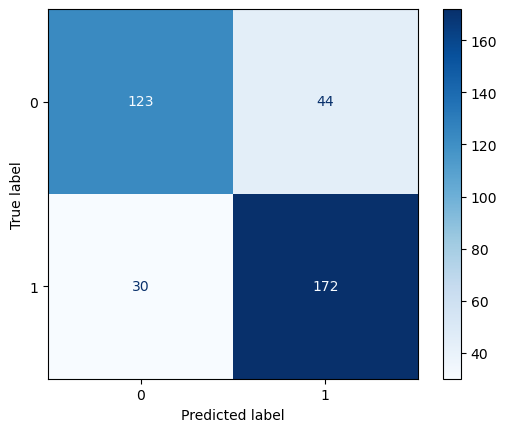

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Blues')

# LSTM with more layers

In [22]:
n_steps = 36
n_inputs = 1

model = keras.models.Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

Epoch 1/20
27/27 [==============================] - 6s 76ms/step - loss: 0.5097 - accuracy: 0.7364 - val_loss: 0.4087 - val_accuracy: 0.8238
Epoch 2/20
27/27 [==============================] - 1s 41ms/step - loss: 0.4425 - accuracy: 0.7944 - val_loss: 0.4144 - val_accuracy: 0.8184
Epoch 3/20
27/27 [==============================] - 1s 43ms/step - loss: 0.4241 - accuracy: 0.7851 - val_loss: 0.4115 - val_accuracy: 0.8211
Epoch 4/20
27/27 [==============================] - 1s 41ms/step - loss: 0.4156 - accuracy: 0.7967 - val_loss: 0.3971 - val_accuracy: 0.8211
Epoch 5/20
27/27 [==============================] - 1s 44ms/step - loss: 0.4173 - accuracy: 0.8037 - val_loss: 0.4134 - val_accuracy: 0.7940
Epoch 6/20
27/27 [==============================] - 1s 44ms/step - loss: 0.4106 - accuracy: 0.7991 - val_loss: 0.4032 - val_accuracy: 0.8211
Epoch 7/20
27/27 [==============================] - 1s 41ms/step - loss: 0.4019 - accuracy: 0.7967 - val_loss: 0.4250 - val_accuracy: 0.8157
Epoch 8/20
27

In [24]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.43826720118522644, 0.8048780560493469]

In [25]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


loss: 0.44
accuracy: 80.49%


In [26]:
# Predictions are probabilities.
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 10ms/step


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       167
           1       0.82      0.83      0.82       202

    accuracy                           0.80       369
   macro avg       0.80      0.80      0.80       369
weighted avg       0.80      0.80      0.80       369



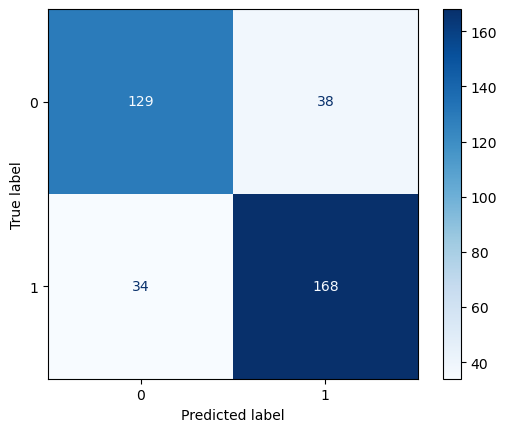

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Blues')